<a href="https://colab.research.google.com/github/riinakik/digital-humanities-technologies/blob/main/assignment_01_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code downloads a text file and two image masks from Google Drive, reads the text, loads the images, and converts them into NumPy arrays to use later for generating a word cloud.

In [1]:
import urllib.request
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import requests
import matplotlib.pyplot as plt

url = "https://drive.google.com/uc?export=download&id=15cocRTr8kcybOfvRlDyNRoUNkubqslS1"
response = urllib.request.urlopen(url)
text = response.read().decode("utf-8")

mask_url = "https://drive.google.com/uc?export=download&id=1fjSZ0OLuRKQwcS8cVVKK8YkEQnHLSSdB"
urllib.request.urlretrieve(mask_url, "image.png")
mask = np.array(Image.open("image.png"))

mask2_url = "https://drive.google.com/uc?export=download&id=1o-3WVFtfeq15DAJn1ozrkr5bVG9q-oOm"
urllib.request.urlretrieve(mask2_url, "image1.png")
mask2 = np.array(Image.open("image1.png"))

This code:

* Prints the first 100 characters of the text.
* Prints the last 100 characters of the text.
* Splits the text into two halves.
* Prints the first 300 characters of the second half.

In [ ]:
print("FIRST 100:\n", text[:100])

print("\nLAST 100:\n", text[-100:])

mid = len(text) // 2
first_half = text[:mid]
second_half = text[mid:]

print("\nSECOND HALF:\n", second_half[:300])


FIRST 100:
 ﻿Johann Sebastian Bach (31 March [O.S. 21 March] 1685 – 28 July 1750) was a German composer and musi

LAST 100:
 ifferent box sets of performances of his complete oeuvre marking the 250th anniversary of his death.

SECOND HALF:
  last decades of his life, Bach reworked and extended many of his earlier compositions. He died due to complications following eye surgery in 1750 at the age of 65. Four of his twenty children, Wilhelm Friedemann, Carl Philipp Emanuel, Johann Christoph Friedrich, and Johann Christian, became compose


This code:
* Splits the text into individual words and takes the first 20 words.
* Extracts the second letter of each word (if the word has at least 2 letters).
* Prints the list of second letters.
* Joins these second letters into one string and prints it.
* Then prints each of the first 20 words together with its second letter.

In [ ]:
words = text.split()
words_20 = words[:20]

second_letters = [w[1] for w in words_20 if len(w) > 1]
print(second_letters)

result = "".join(w[1] for w in words_20 if len(w) > 1)
print(result)

for w in words_20:
    if len(w) > 1:
        print(w, "→", w[1])


['J', 'e', 'a', '3', 'a', 'O', '1', 'a', '6', '8', 'u', '7', 'a', 'e', 'o', 'n', 'u', 'f']
Jea3aO1a68u7aeonuf
﻿Johann → J
Sebastian → e
Bach → a
(31 → 3
March → a
[O.S. → O
21 → 1
March] → a
1685 → 6
28 → 8
July → u
1750) → 7
was → a
German → e
composer → o
and → n
musician → u
of → f


This code finds and prints the longest sentence in the text.

In [12]:
sentences = text.split(".")
longest = max(sentences, key=lambda s: len(s.split()))
print(longest.strip())


He is known for his prolific output across a variety of instruments and forms, including the orchestral Brandenburg Concertos; solo instrumental works such as the cello suites and sonatas and partitas for solo violin; keyboard works such as the Goldberg Variations and The Well-Tempered Clavier; organ works such as the Schübler Chorales and the Toccata and Fugue in D minor; and choral works such as the St Matthew Passion and the Mass in B minor


This code:
* Cleans and splits the text into words.
* Keeps only words that appear once.
* Creates a word cloud from these unique words.
* Displays the word cloud.

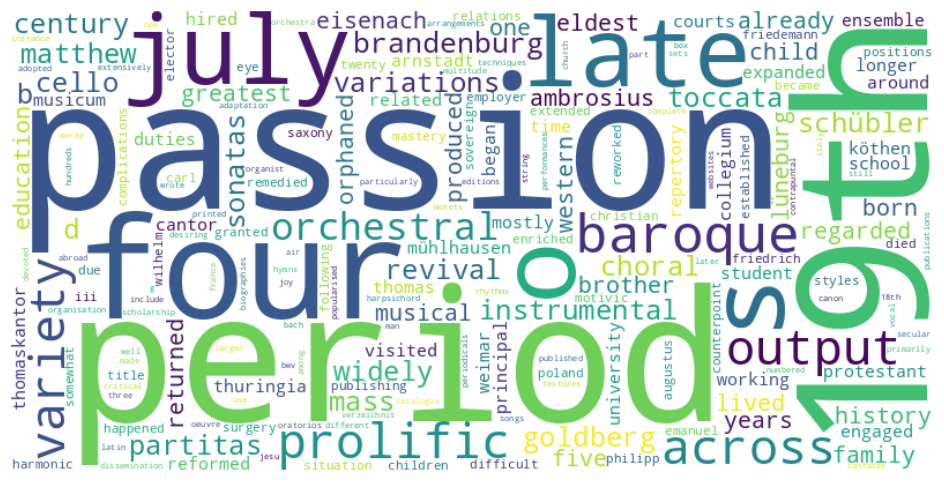

In [3]:
from collections import Counter

text = text.replace("\ufeff", "")

words = [w.lower().strip(".,;:!?()[]\"'") for w in text.split()]
counts = Counter(words)

filtered_words = [w for w in words if counts[w] <= 1]

filtered_text = " ".join(filtered_words)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(filtered_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


This code extracts all two-word phrases (bigrams) that appear at least twice in the text and creates a word cloud based on these frequently occurring bigrams.

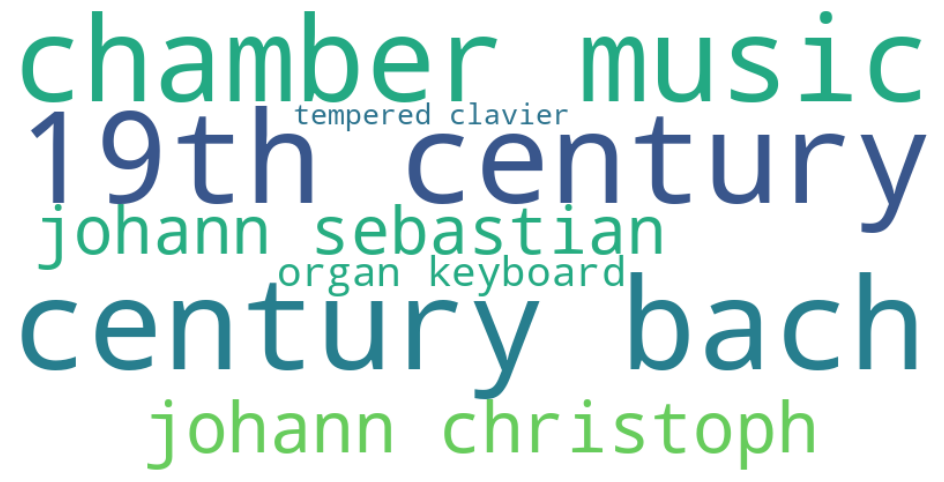

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform([text.lower()])
bigrams = dict(zip(vectorizer.get_feature_names_out(), X.toarray().flatten()))

bigrams_2plus = {b: c for b, c in bigrams.items() if c >= 2}

wc = WordCloud(width=800, height=400, background_color="white")
wc.generate_from_frequencies(bigrams_2plus)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


This code:
* Downloads an external list of stopwords and adds them to the default stopwords.
* Cleans and splits the text into words and counts how often each word appears.
* Defines a color function:
  words appearing more than 2 times → purple,
  all others → yellow.
* Creates a word cloud using the extended stopword list and the custom colors.
* Displays the word cloud on a black background.

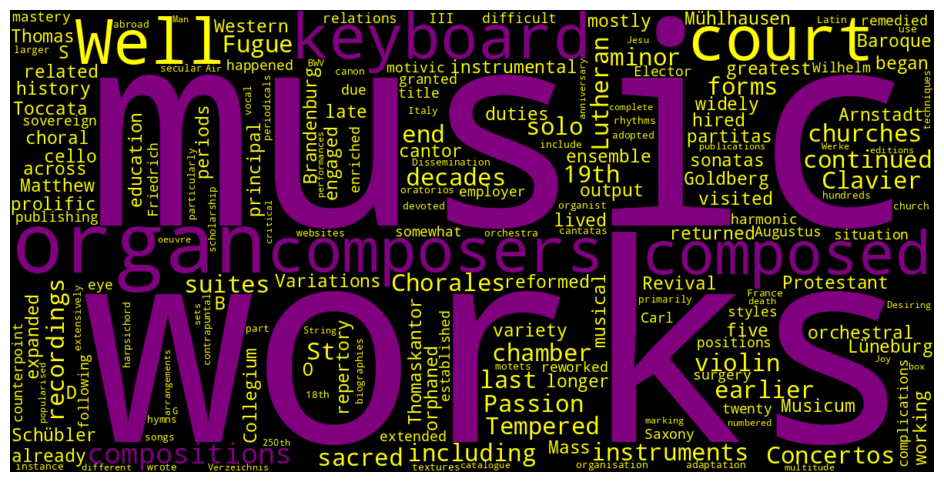

In [ ]:

stops_url = "https://drive.google.com/uc?export=download&id=1UcItx7pOdDiNE1Quj1Y8tzk1XKZML5sB"
response = requests.get(stops_url)
file_words = [w.strip().lstrip("\ufeff") for w in response.text.splitlines()]

stops = set(STOPWORDS)
stops.update(file_words)

words = [w.lower().strip(".,;:!?()[]\"'") for w in text.split()]
counts = Counter(words)

def color_func(word, font_size, position, orientation, font_path, random_state):
    if counts[word] > 2:
        return "purple"
    else:
        return "yellow"

wc = WordCloud(
    stopwords=stops,
    background_color="black",
    color_func=color_func,
    width=1200,
    height=600
).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

This code:
* Defines a set of music-related word roots.
* Cleans and splits the text into words.
* Keeps only the words that start with any of the music roots.
* Generates a word cloud from these music-related words using a mask image and a rainbow colormap.
* Displays the word cloud on a black background.

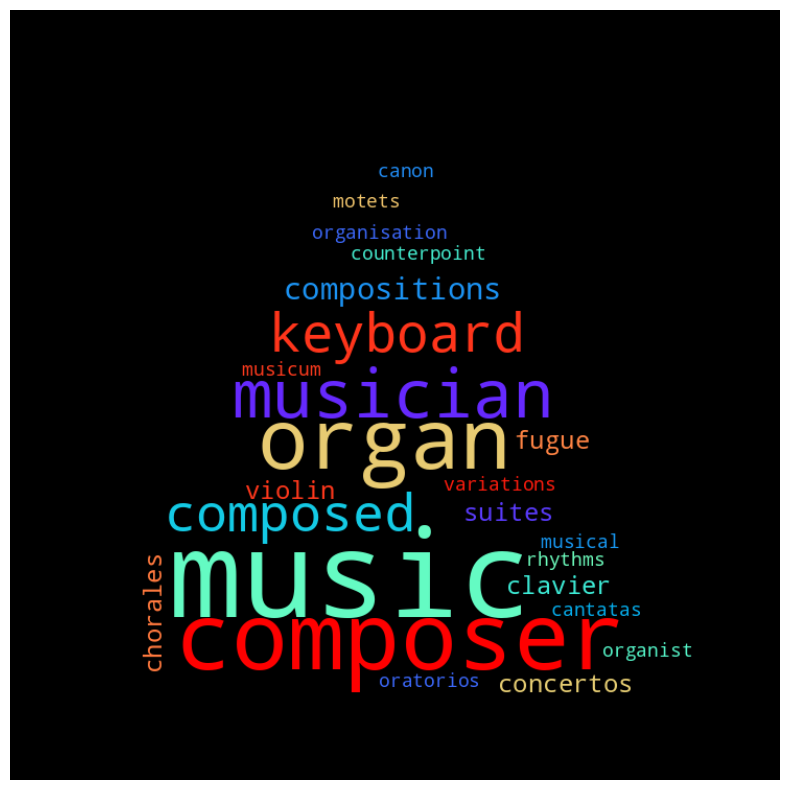

In [ ]:
music_roots = {
    "music", "musician", "fugue", "canon",
    "chorale", "cantata", "suite", "concerto",
    "variation", "clavier", "keyboard", "violin",
    "organ", "motet", "oratorio",
    "counterpoint", "harmony", "rhythm",
    "composition", "compose"
}

words = text.lower().split()

cleaned = [w.strip(".,;:!?()[]\"'") for w in words]

filtered_text = " ".join(
    w for w in cleaned
    if any(w.startswith(root) for root in music_roots)
)

wc = WordCloud(
    mask=mask,
    background_color="black",
    colormap="rainbow"
).generate(filtered_text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


This code:
* Downloads extra stopwords and adds them to the default stopword list.
* Cleans the text and removes all stopwords.
* Finds the 20 most frequent words in the cleaned text.
* Creates a word cloud using only these top words, with a mask image and rainbow colors.
* Displays the word cloud on a black background.

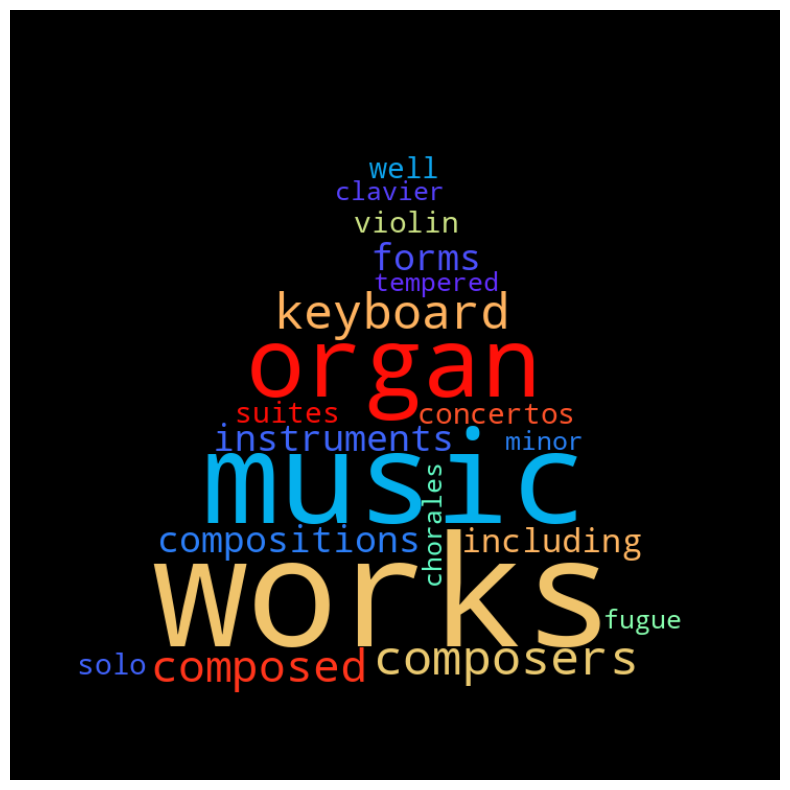

In [ ]:

stops_url = "https://drive.google.com/uc?export=download&id=1UcItx7pOdDiNE1Quj1Y8tzk1XKZML5sB"
response = requests.get(stops_url)
file_words = [w.strip().lstrip("\ufeff") for w in response.text.splitlines()]

stops = set(STOPWORDS)
stops.update(file_words)

words = [w.lower().strip(".,;:!?()[]\"'") for w in text.split()]
words = [w for w in words if w not in stops]

counts = Counter(words)
top10 = [w for w, c in counts.most_common(20)]

filtered_text = " ".join(top10)

wc = WordCloud(
    mask=mask,
    background_color="black",
    colormap="rainbow",
    width=1000,
    height=1000
).generate(filtered_text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()